### Import libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline
plt.style.use('ggplot')

### Read data 

In [2]:
df = pd.read_csv('data/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Perform EDA

In [ ]:
df.info()

In [ ]:
df.EstimatedSalary.unique()

In [ ]:
df.describe()

In [ ]:
df.isnull().all()

In [ ]:
# Look at data distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(ax=axes[0,0],x= df['Age'])
axes[0,0].set_title('Age Of People')
sns.histplot(ax=axes[0,1],x='Age',data=df)
axes[0,1].set_title('Distribution Of Ages')

sns.boxplot(ax=axes[1,0],data = df['EstimatedSalary'])
axes[1,0].set_title('Estimated Salary Of People')
sns.histplot(ax=axes[1,1],x='EstimatedSalary',data=df)
axes[1,1].set_title('Distribution Of Estimated Salary')
plt.show()

In [ ]:
fig ,axes = plt.subplots(1,2, figsize=(15,5))
sns.countplot(ax=axes[0],x='Purchased',data=df)
axes[0].set_title('Overall Number Of Purchases')
sns.countplot(ax=axes[1],x='Purchased',hue='Gender',data=df)
axes[1].set_title('Number Of Purchases By Gender')
plt.show()

In [6]:
df.loc[(df.Age >= 18) & (df.Age < 26), 'AgeGroup'] = '18-25'
df.loc[(df.Age >= 26) & (df.Age < 36), 'AgeGroup'] = '26-35'
df.loc[(df.Age >= 36) & (df.Age < 46), 'AgeGroup'] = '36-45'
df.loc[(df.Age >= 46) & (df.Age < 55), 'AgeGroup'] = '46-55'
df.loc[(df.Age > 55) , 'AgeGroup'] = 'over-55'

In [7]:
df.loc[(df.EstimatedSalary >= 15000) & (df.Age <= 30000), 'SalaryGroup'] = '15-30K'
df.loc[(df.EstimatedSalary > 30000) & (df.Age <= 50000), 'SalaryGroup'] = '31-50K'
df.loc[(df.EstimatedSalary > 50000) & (df.Age <= 70000), 'SalaryGroup'] = '51-70K'
df.loc[(df.EstimatedSalary > 70000) & (df.Age <= 90000), 'SalaryGroup'] = '71-90K'
df.loc[(df.EstimatedSalary > 90000) & (df.Age <= 120000), 'SalaryGroup'] = '91-120K'
df.loc[df.EstimatedSalary > 120000, 'SalaryGroup'] = '120K-Over'

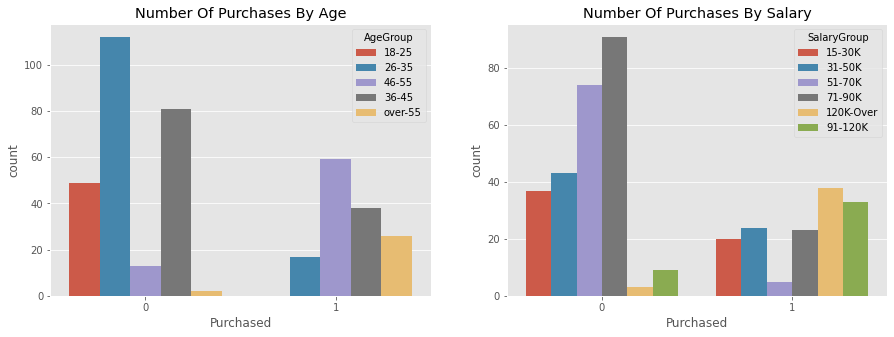

In [8]:
fig ,axes = plt.subplots(1,2, figsize=(15,5))
sns.countplot(ax=axes[0],x='Purchased',hue='AgeGroup',data=df)
axes[0].set_title('Number Of Purchases By Age')
sns.countplot(ax=axes[1],x='Purchased',hue='SalaryGroup',data=df)
axes[1].set_title('Number Of Purchases By Salary')
plt.show()

### Plot logistic s-shape curve

<AxesSubplot:xlabel='Age', ylabel='Purchased'>

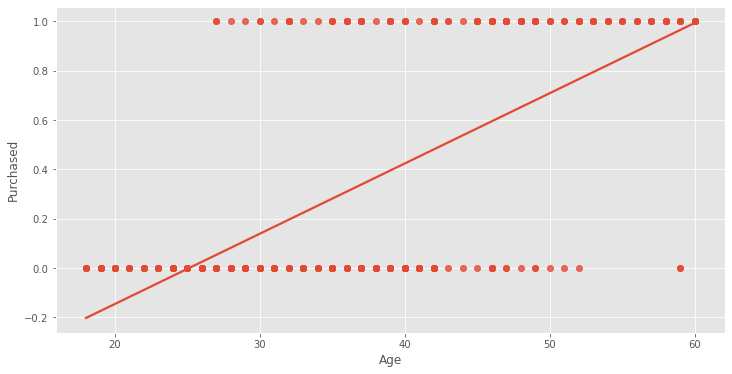

In [4]:
plt.figure(figsize=(12,6))
sns.regplot(x=df['Age'], y=df['Purchased'], data=df, ci=None)

<AxesSubplot:xlabel='Age', ylabel='Purchased'>

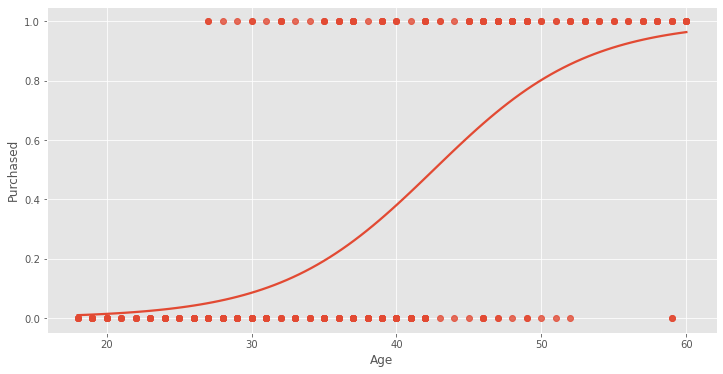

In [5]:
plt.figure(figsize=(12,6))
sns.regplot(x=df['Age'], y=df['Purchased'], data=df, logistic=True, ci=None)

### Let's cleanup and prepare data

In [9]:
# Drop user ID. Plus Convert categorical to numeric. 
df.drop(columns=['User ID','AgeGroup','SalaryGroup'],axis = 1, inplace = True)
label = {'Male': 0 ,"Female" : 1}
df['Gender'].replace(label, inplace= True)

In [10]:
# set inputs variables; X and y
X = df.drop('Purchased',axis = 1)     
y = df['Purchased']

In [11]:
X.head()

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000


In [12]:
# we have to scale the data for better result
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
d_scaled = scaler.fit_transform(X)
data_scaled1 = pd.DataFrame(d_scaled)
data_scaled1.head()

,0,1,2
0,-1.020204,-1.781797,-1.490046
1,-1.020204,-0.253587,-1.460681
2,0.980196,-1.113206,-0.785290
3,0.980196,-1.017692,-0.374182
4,-1.020204,-1.781797,0.183751


In [13]:
#Split data into test and training dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(d_scaled,y,test_size=0.20,random_state=42)

### Create Logistic Regression model and train it

In [14]:
#build the model from logisticRegresion.
from sklearn.linear_model import LogisticRegression
#model object
model = LogisticRegression(C=0.1,max_iter = 500)
#train the model with train datasets
model.fit(X_train,y_train)
#Predict based on the test dataset
y_pred = model.predict(X_test)

In [ ]:
print(f'Weight Coefficient : {model.coef_}')
print(f'Bias : {model.intercept_}')

### Check Prediction Results

In [15]:
print(f'Test accuracy: {model.score(X_test,y_test)}')
print(f'Train accuracy: {model.score(X_train,y_train)}')

Test accuracy: 0.8625
Train accuracy: 0.8125


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [19]:
from sklearn.metrics import confusion_matrix

#Check the prediction results with confusion matrix
score = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
cm

array([[50,  2],
       [ 9, 19]], dtype=int64)

### Our model has 86 percent accuracy. This rate can be increased by changing some parameters.

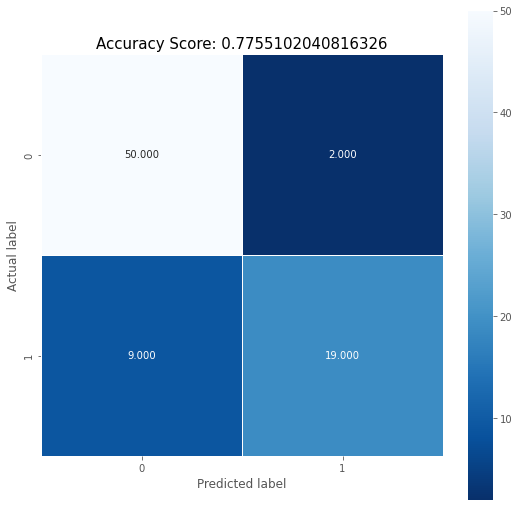

In [20]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

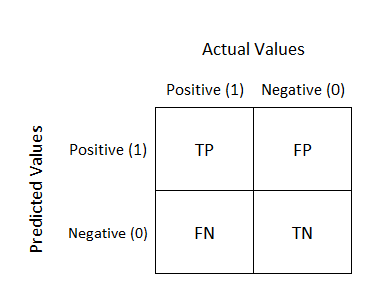

In [21]:
# Get confusion matrix image
from IPython.display import Image
Image(filename=r'C:\Users\haq\Videos\thumbnails\confusionmatrix.png') 

True Positive:
Interpretation: You predicted positive and it’s true.

True Negative:
Interpretation: You predicted negative and it’s true.

False Positive: (Type 1 Error )
Interpretation: You predicted positive and it’s false.

False Negative: (Type 2 Error)
Interpretation: You predicted negative and it’s false.